In [1]:
import urllib.request
import os
import matplotlib.pyplot as plt
import numpy as np
import astroML.resample
import scipy
import math
import astroML.stats

<p>Q1. In class, we showed histograms of standard deviation and σG of bootstrap samples drawn from a Gaussian distribution with mean equal to 0 and standard deviation equal to 1. Draw a similar histogram of median of 10,000 bootstrap samples drawn from the same Gaussian distribution.
    <br/>
According to http://tinyurl.com/h6p43o8, the standard deviation of the sample median of a Gaussian distribution is equal to $\sqrt{\dfrac{\pi}{2*n}}$. Overlay a Gaussian distribution on top of the histogram with mean equal to the mean of the generated data sample and standard deviation equal to the standard deviation of the median</p>

In [2]:
m = 1000  # number of points
n = 10000  # number of bootstrap samples
bins=40 #bins in the histogram

dist = scipy.stats.norm(0, 1)
data=dist.rvs(m)
x=np.linspace(-0.5,0.5,10000)

# Compute bootstrap resamplings of data
medians = astroML.resample.bootstrap(data, n,  np.median, kwargs=dict(axis=1))
sigma_g = astroML.resample.bootstrap(data, n, astroML.stats.median_sigmaG, kwargs=dict(axis=1))
# sigma_g[0] will have median array and sigma_g[1] will have estimator for standard deviation
mean=np.mean(medians)
std_dev=np.std(medians)
std_dev_formula=np.sqrt(math.pi/(2*m))
medians_gaussian=scipy.stats.norm.pdf(x,loc=mean,scale=std_dev)
medians_gaussian_formula=scipy.stats.norm.pdf(x,loc=mean,scale=std_dev_formula)
std_dev_estimate=astroML.stats.median_sigmaG(medians)
medians_gaussian_est=scipy.stats.norm.pdf(x,loc=mean,scale=std_dev_estimate[1])

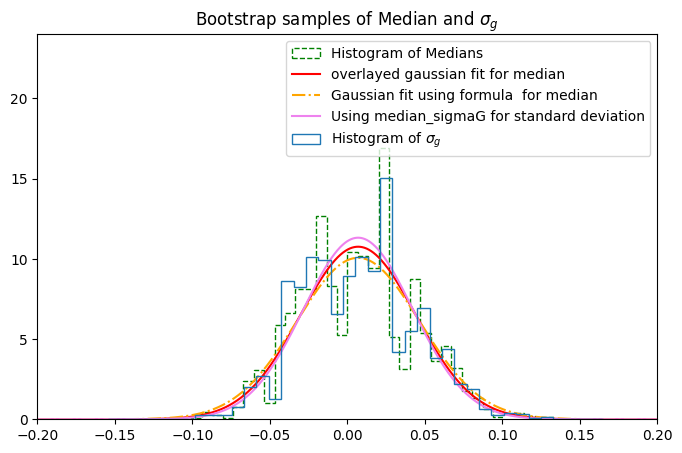

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(medians,bins, density=True, histtype='step',ls="dashed",color='green', label="Histogram of Medians")
ax.plot(x, medians_gaussian, color='red',label="overlayed gaussian fit for median")
ax.plot(x, medians_gaussian_formula, color='orange',ls='-.',label="Gaussian fit using formula  for median")
ax.plot(x, medians_gaussian_est, color='violet',ls='-',label=r"Using median_sigmaG for standard deviation")
ax.hist(sigma_g[0],bins, density=True, histtype='step', label=r'Histogram of $\sigma_g$')

ax.set_xlim(-0.2,0.2)
ax.set_ylim(0,24)
# set this x limit as I liked for better data visulaization

plt.title(r"Bootstrap samples of Median and $\sigma_g$")

ax.legend()

plt.show()

In [4]:
print("Standard deviation of bootstrap samples for Standard Normal Distribution using formula is",np.sqrt(math.pi/(2*m)))
# Formula used http://artent.net/2013/08/12/the-exact-standard-deviation-of-the-sample-median/

Standard deviation of bootstrap samples for Standard Normal Distribution using formula is 0.03963327297606011


In [5]:
print("Standard deviation of bootstrap samples from data",np.std(medians))

Standard deviation of bootstrap samples from data 0.03708492482170665


<p>Q2. arXiv:1008.4686, Exercise 1 on Page 5, except the last sentence of the question related to $\sigma^{2}_m$. (Hint : Use $\chi^{2}$ minimization to obtain best-fit values of b and m, instead of linear algebra. You can look up curve$\_$fit function in scipy.)</p>

In [6]:
# So we have to consider x,y and sigma_y columns from table in that pdf and values from 5 to 20 values are below:
# 5 203 495 21 5 -0.33
# 6 58 173 15 9 0.67
# 7 210 479 27 4 -0.02
# 8 202 504 14 4 -0.05
# 9 198 510 30 11 -0.84
# 10 158 416 16 7 -0.69
# 11 165 393 14 5 0.30
# 12 201 442 25 5 -0.46
# 13 157 317 52 5 -0.03
# 14 131 311 16 6 0.50
# 15 166 400 34 6 0.73
# 16 160 337 31 5 -0.52
# 17 186 423 42 9 0.90
# 18 125 334 26 8 0.40
# 19 218 533 16 6 -0.78
# 20 146 344 22 5 -0.56

data_x=np.array([203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146])
data_y=np.array([495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344])
sigma_y=np.array([21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22])

def linear_function(x,m,b):
    return m*x+b

param = scipy.optimize.curve_fit(linear_function, xdata=data_x, ydata=data_y, sigma=sigma_y)
print("Required parameters for linear model after Chisquare minimization is",param[0])

Required parameters for linear model after Chisquare minimization is [ 2.23992086 34.04772358]


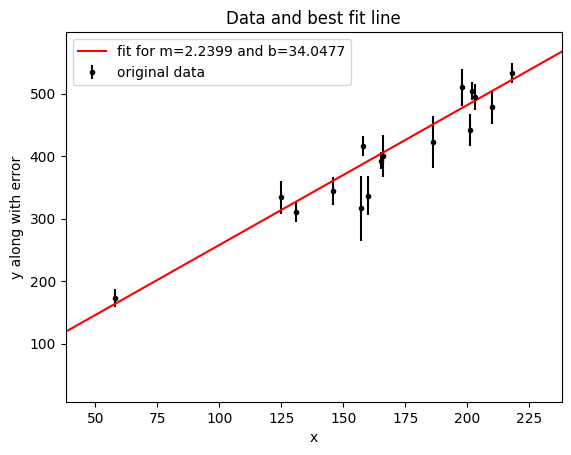

In [7]:
# plotting corresponding plots to compare 
plt.errorbar(data_x, data_y, sigma_y, label='original data',fmt='.k')
x=np.linspace(0,240,10000)
y=np.zeros(x.shape)
y=param[0][1] + param[0][0]*x# computing y after getting paramaters 
plt.xlim(np.min(data_x)-20,np.max(data_x)+20)
plt.plot(x, y, label=f'fit for m={round(param[0][0],4)} and b={round(param[0][1],4)}',color="red")
plt.title("Data and best fit line")
plt.xlabel('x')
plt.ylabel('y along with error')
plt.legend()
plt.show()

<p>Q3. Calculate the p-value for the four chi-square values for the plot shown in class from astroMl book which can be found at https://www.astroml.org/book_figures_1ed/chapter4/fig_chi2_eval.html.(Hint : You can read off the $\chi^{2}$ values from the graph by multiplying by D.O.F.)</p>

In [8]:
# few code statements extracted from given link which are our question

def calculate_p_value(y,err):
    mean = np.mean(y)
    z = (y - mean) / err
    chi2 = np.sum(z ** 2)
    #returing the p-value
    return scipy.stats.chi2(N - 1).sf(chi2)

N = 50
L0 = 10
dL = 0.2

t = np.linspace(0, 1, N)
L_obs = np.random.normal(L0, dL, N)


y_vals = [L_obs, L_obs, L_obs, L_obs + 0.5 - t ** 2]
y_errs = [dL, dL * 2, dL / 2, dL]

# Now we have to compute the p value for each y_vals with errors y_errs 

# For correct errors i.e y_err=dL i.e index =0
correct=calculate_p_value(y_vals[0],y_errs[0])
overestimated=calculate_p_value(y_vals[1],y_errs[1])
underestimated=calculate_p_value(y_vals[2],y_errs[2])
incorrect=calculate_p_value(y_vals[3],y_errs[3])

print("p-value for correct errors is",correct)
print("p-value for overestimated errors is",overestimated)
print("p-value for underestimated errors is",underestimated)
print("p-value for incorrect model is",incorrect)

p-value for correct errors is 0.39478540952517926
p-value for overestimated errors is 0.9999999623824367
p-value for underestimated errors is 8.19483998249782e-21
p-value for incorrect model is 2.3992715733448604e-17


<p>As expected from the above we can clearly see that for correct model and errors p value is likely between 0 to 1 whereas for overestimated error it is close to 1 and for incorrect model or understimated errors it is close to 0.</p>